<a href="https://colab.research.google.com/github/MiguelGLP/AI2/blob/main/Copia_de_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In traditional machine learning, simpler models like linear regression, decision trees, or support vector machines are commonly used for various tasks. However, these models may struggle to capture intricate patterns in large and high-dimensional datasets.

Neural networks, on the other hand, are highly flexible and can learn complex patterns from data through the hierarchical arrangement of neurons in multiple layers. Deep learning architectures enable neural networks to automatically learn feature representations from raw data, bypassing the need for manual feature engineering.



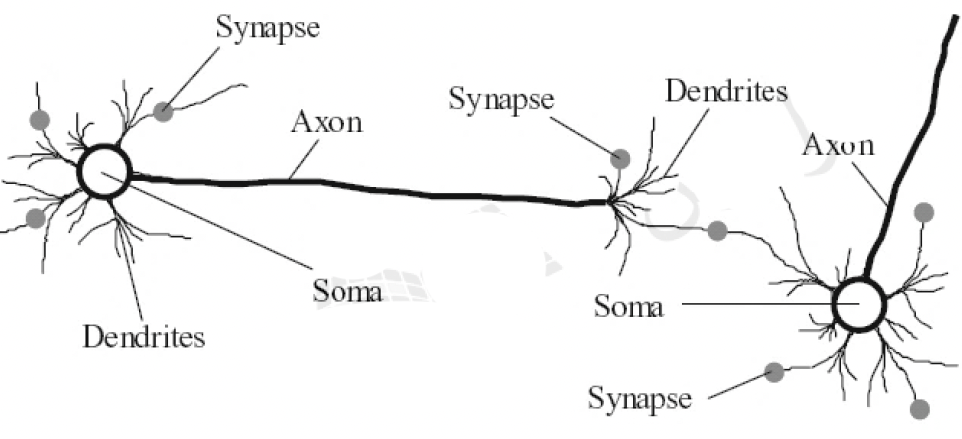

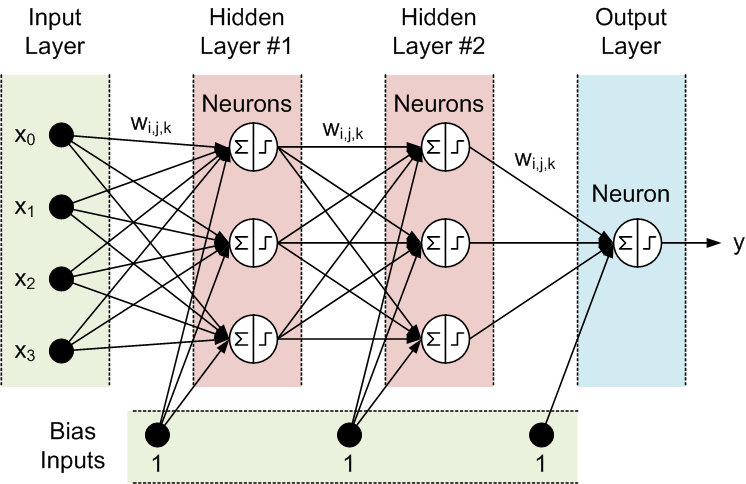

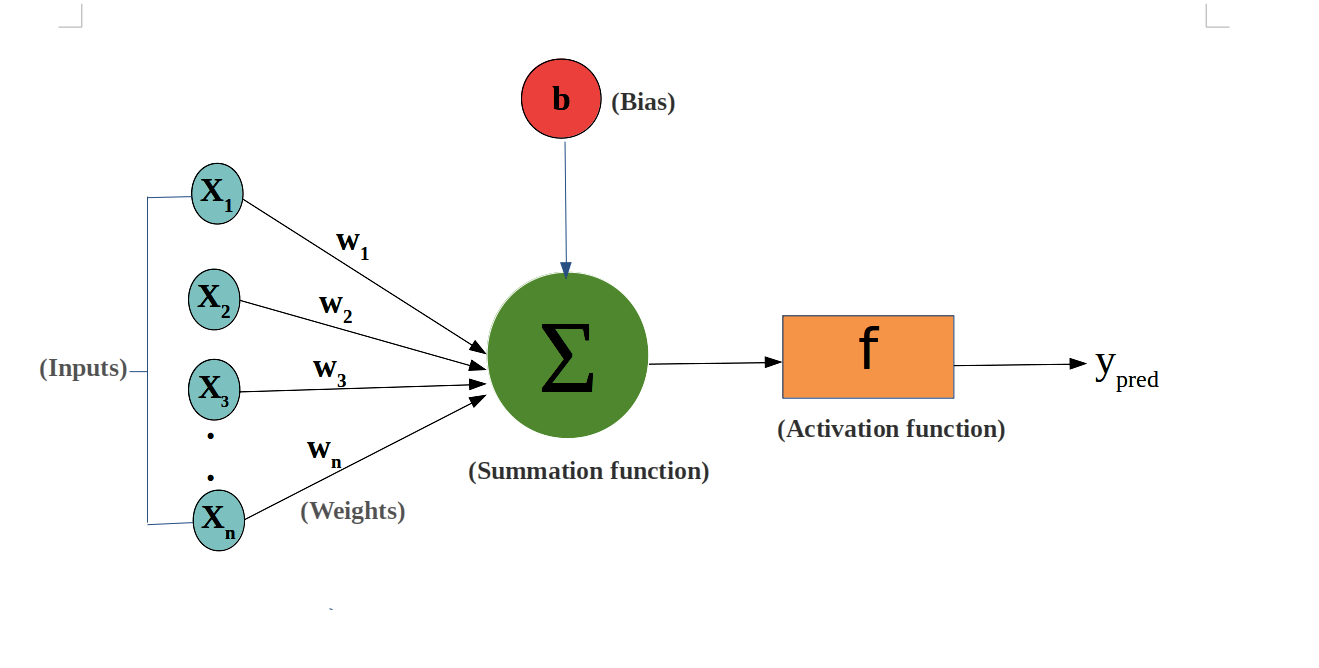

**Deep learning specifically refers to the use of neural networks with multiple hidden layers (typically more than one) to learn intricate patterns in data.**



# **The components of a neuron in a neural network:

**Input**: Neurons in a neural network receive input from other neurons or from the external data being fed into the network. Each input is typically represented as a numeric value.

**Weights**: Each input to a neuron is associated with a weight. These weights represent the strength of the connection between the input and the neuron. During training, these weights are adjusted to optimize the performance of the network.

**Bias**: In addition to the weighted sum of inputs, a neuron often has an associated bias term. This bias term allows the neuron to output non-zero values even when all inputs are zero. It essentially acts as an offset, influencing the overall output of the neuron.

**Activation Function**: The weighted sum of inputs, along with the bias, is passed through an activation function. This function introduces non-linearity into the output of the neuron. Common activation functions include **ReLU** (Rectified Linear Unit), **sigmoid**, **tanh** (Hyperbolic Tangent), and **softmax**.

**Output**: The output of the activation function is the final output of the neuron. This output is then typically passed on to other neurons in the network as input, contributing to the computation of subsequent layers.

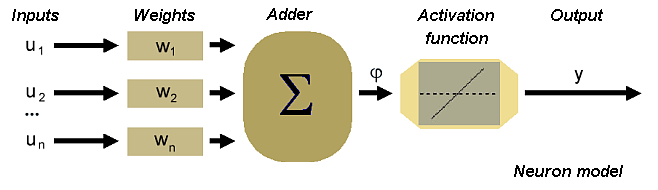

In a neural network, the bias is an additional parameter associated with each neuron. It serves as an offset, allowing the neuron to output non-zero values even when all inputs are zero.

To understand the role of bias, let's consider the weighted sum of inputs to a neuron:

z
=
w
1
⋅
x
1
+
w
2
⋅
x
2
+
…
+
w
n

where

w
i
​
  are the weights associated with each input

x
i
​
 .

The output of the neuron, before applying the activation function, is often calculated as:

y
=
activation
(
z
+
b
)

where

b is the bias term associated with the neuron,
Now, without the bias term (b), if all inputs (xi) are zero, the output of the neuron would also be zero, regardless of the weights. This can limit the expressive power of the network.

**Optimization** algorithms in neural networks are used to update the parameters (weights and biases) of the model during the training process in order to minimize the loss function and improve the model's performance.

# **Backpropagation, short for "backward propagation of errors," is a fundamental algorithm used to train artificial neural networks, particularly in supervised learning settings. It's an optimization technique for adjusting the weights of the network's connections in order to minimize the difference between the predicted output and the actual output.**

Here's how backpropagation works:

**Forward Pass:** During the forward pass, the input data is fed into the neural network, and its predictions are computed layer by layer. Each neuron in the network computes a weighted sum of its inputs, applies an activation function to the result, and passes the output to the neurons in the next layer.
**Loss Computation: **Once the predictions are obtained, the loss function is computed to measure the difference between the predicted output and the actual output. Common loss functions include mean squared error (MSE), cross-entropy loss, and hinge loss, depending on the nature of the problem.
**Backward Pass (Backpropagation)**: In the backward pass, the gradients of the loss function with respect to the network's parameters (weights and biases) are computed using the chain rule of calculus. The gradients represent how much the loss would change with a small change in each parameter.
**Parameter Update: **Finally, the gradients are used to update the parameters of the network using an optimization algorithm such as gradient descent or one of its variants. The parameters are adjusted in the direction that minimizes the loss function, thereby improving the network's performance.
The process of forward pass, loss computation, backward pass, and parameter update is repeated iteratively for a number of epochs until the model converges to a satisfactory solution or until a stopping criterion is met.

Backpropagation allows neural networks to learn from data by iteratively adjusting their parameters to minimize the prediction error. It's a key algorithm that enables the training of deep neural networks with multiple layers, making it a cornerstone of modern machine learning and artificial intelligence.

# Image classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

**Keras* The high-level API for TensorFlow


Keras is the high-level API of the TensorFlow platform. It provides an approachable, highly-productive interface for solving machine learning (ML) problems, with a focus on modern deep learning. Keras covers every step of the machine learning workflow, from data processing to hyperparameter tuning to deployment. It was developed with a focus on enabling fast experimentation.

With Keras, you have full access to the scalability and cross-platform capabilities of TensorFlow. You can run Keras on a TPU Pod or large clusters of GPUs, and you can export Keras models to run in the browser or on mobile devices. You can also serve Keras models via a web API.

**Keras** is designed to reduce cognitive load by achieving the following goals:

Offer simple, consistent interfaces.
Minimize the number of actions required for common use cases.
Provide clear, actionable error messages.
Follow the principle of progressive disclosure of complexity: It's easy to get started, and you can complete advanced workflows by learning as you go.
Help you write concise, readable code.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np # numeric/vecotorization
import matplotlib.pyplot as plt # visualisation

print(tf.__version__)

2.19.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000  images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist # this is an example and this code belongs only to this example in Keras

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()# this is for loading this example data

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step



## How concert the images to numeric array

The code to convert Images  to array

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,   # 80% train, 20% validation
    subset="training",
    seed=123,
    image_size=(100, 100),
    batch_size=32,
    label_mode="categorical"


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels.shape

(60000,)

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

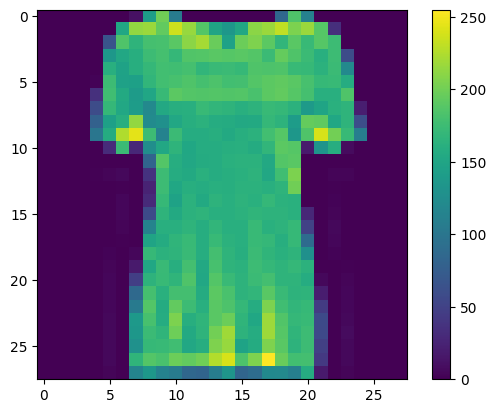

In [ ]:
plt.figure()
plt.imshow(train_images[10]) # this is important code for checking the transformed images to array
plt.colorbar()

plt.show()

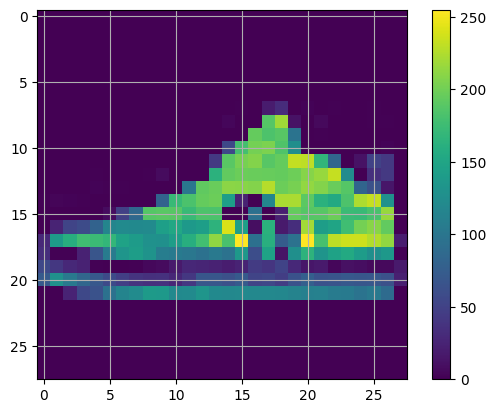

In [ ]:
plt.figure()
plt.imshow(train_images[49999])
plt.colorbar()
plt.grid(True)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.
plt.subplot(5,5,i+1) is used to create a grid of subplots within a single figure. Here's what each part does:

plt: This refers to the Matplotlib library, which should have been imported earlier in the code using import matplotlib.pyplot as plt.
subplot(5,5,i+1): This function is used to create a subplot in a grid layout. It takes three arguments:
The first argument, 5, specifies the number of rows in the grid.
The second argument, 5, specifies the number of columns in the grid.
The third argument, i+1, specifies the index of the subplot to create. i is typically a loop variable used to iterate over each subplot in the grid, starting from 0. Since subplot indices start from 1 (not 0), i+1 is used.

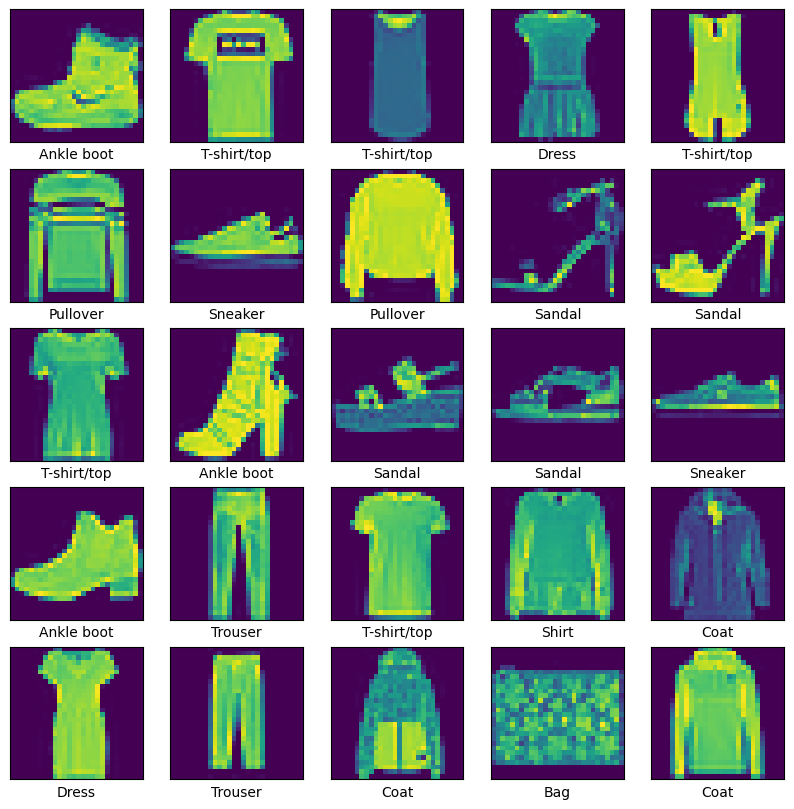

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # always the first layer is fallten to get data from outside
    tf.keras.layers.Dense(128, activation='relu'), # hidden layer
    tf.keras.layers.Dense(68, activation='relu'), # hidden layer
    tf.keras.layers.Dense(10) # output layer and always the number of nerouns is equal to the number categories of the final output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second has 68 neurons and last layer returns a logits array with length of 10 neurons. Each neurons in the last layer contains a score that indicates the current image belongs to one of the 10 classes.


tf.keras.Sequential: This creates an instance of a sequential model, indicating that layers will be added one by one in sequence.
tf.keras.layers.Flatten(input_shape=(28, 28)): This line adds a Flatten layer as the first layer of the model. The Flatten layer is used to flatten the input data into a one-dimensional array. In this case, it's used to flatten the 28x28 pixel images into a 1D array of 784 values. The input_shape=(28, 28) argument specifies the shape of the input data, which is a 28x28 image.
tf.keras.layers.Dense(128, activation='relu'): This line adds a fully connected Dense layer with 128 units (neurons) and ReLU activation function. The Dense layer is a standard fully connected layer where each neuron is connected to every neuron in the previous layer.
tf.keras.layers.Dense(10): This line adds another fully connected Dense layer with 10 units. This layer doesn't specify an activation function explicitly, which means it will apply a linear transformation to the input. In this case, it's often used as the output layer for classification tasks, where the model outputs raw prediction scores which can be passed through a softmax function to get probabilities for each class.
So, in summary, this model consists of three layers:

A Flatten layer to flatten the input images.
A fully connected Dense layer with 128 neurons and ReLU activation.
Another fully connected Dense layer with 10 neurons, serving as the output layer.



common activation functions used in neural networks:

**ReLU** (Rectified Linear Unit):
ReLU is defined as
f
(
x
)
=
max
⁡
(
0
,
x
)
f(x)=max(0,x), meaning it returns 0 for any negative input and returns the input itself for any positive input.
ReLU is computationally efficient and helps mitigate the vanishing gradient problem, as it does not saturate in the positive region, allowing for faster convergence during training.
However, ReLU neurons can sometimes become "dead" during training, where they output 0 for all inputs. This can lead to a phenomenon known as the "dying ReLU problem."
Despite this drawback, ReLU remains widely used in deep neural networks due to its simplicity and effectiveness.


**Sigmoid**:
The sigmoid function is defined as
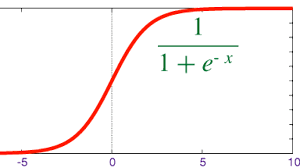
 , and it squashes the input values between 0 and 1.
Sigmoid is commonly used in binary classification problems where the output needs to be interpreted as a probability.
One drawback of the sigmoid function is that it saturates and tends to zero or one for large positive or negative inputs, respectively, leading to vanishing gradients and slower convergence during training.
Sigmoid is rarely used in hidden layers of deep neural networks due to these saturation issues.
Tanh (Hyperbolic Tangent):
Tanh is similar to the sigmoid function but squashes the input values between -1 and 1. It is defined as
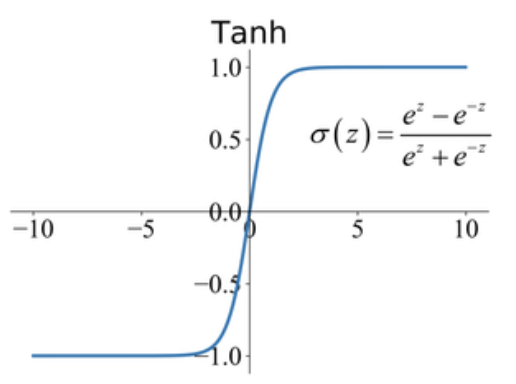
 .
Tanh addresses the saturation problem of the sigmoid function to some extent, as it has stronger gradients for inputs far from zero, leading to faster convergence.
Like the sigmoid function, tanh is also commonly used in binary classification problems, but it's more common in hidden layers of neural networks due to its zero-centered output, which helps with optimization.
Softmax:
Softmax is often used as the activation function in the output layer of a neural network for multi-class classification problems.
It takes a vector of arbitrary real-valued scores (logits) as input and normalizes it into a probability distribution over multiple classes, ensuring that the sum of the probabilities is equal to 1.
Softmax is defined as

Softmax is useful for classification tasks because it provides interpretable probabilities for each class, allowing the model to make informed decisions about the most likely class label.
Each of these activation functions has its advantages and disadvantages, and the choice of which one to use depends on the specific requirements of the task at hand, as well as considerations such as the architecture of the neural network and the characteristics of the data.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


**The components of the model.compile() function call** :
The model.compile() function call configures the training process for the neural network model. It specifies the optimizer to use for updating the model's parameters, the loss function to minimize during training, and the evaluation metric(s) to monitor the model's performance. Once compiled, the model is ready to be trained using the specified optimization
**Optimizer** (optimizer='adam'):
The optimizer parameter specifies the optimization algorithm to be used during the training process.
In this case, 'adam' refers to the Adam optimizer, which is a popular optimization algorithm widely used in training neural networks.
Adam combines the benefits of two other popular optimization algorithms, AdaGrad and RMSProp, by maintaining adaptive learning rates for each parameter and keeping an exponentially decaying average of past gradients.
**Loss Function **(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)):
The loss parameter specifies the loss function to be used during training.
In this case, tf.keras.losses.SparseCategoricalCrossentropy is used as the loss function.
S**parseCategoricalCrossentropy** is a common choice for multi-class classification problems where the labels are integers (e.g., 0, 1, 2, ...) representing the class indices.
The from_logits=True argument indicates that the model's output is raw logits, meaning the output of the model's final layer has not been passed through a softmax activation function. This is important because SparseCategoricalCrossentropy expects raw logits as input, allowing for numerical stability during training.
**Metrics** (metrics=['accuracy']):
The metrics parameter specifies the evaluation metric(s) to be monitored during training and testing.
In this case, ['accuracy'] indicates that accuracy is the metric of interest.
Accuracy measures the proportion of correctly classified samples in the validation (or test) set.
During training, the accuracy metric is computed and displayed after each epoch to track the performance of the model over time.

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

# **batch_size	**: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32. Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.PyDataset instances (since they generate batches).

In [ ]:
model.fit(train_images, train_labels, epochs=30, batch_size=40) #

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9730 - loss: 0.0675
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9730 - loss: 0.0715
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9758 - loss: 0.0660
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9730 - loss: 0.0709
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9737 - loss: 0.0675
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9750 - loss: 0.0680
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9724 - loss: 0.0701
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9740 - loss: 0.0681
Epoch 9/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9735 - loss: 0.0708
Epoch 10/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9767 - loss: 0.0621
Epoch 11/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9756 - loss: 0.0665
Epoch 12/30
1500/1500 ━━━━━━━

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels) #verbose=2: This parameter controls the verbosity or level of detail of the output during evaluation. In this case, verbose=2 means that detailed information will be displayed during the evaluation process, including the loss and metrics.


print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8862 - loss: 0.7940

Test accuracy: 0.8870999813079834


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse than previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[1000]

array([1.7453416e-01, 2.6955182e-25, 2.5271774e-10, 2.1039630e-16,
       4.0821740e-17, 2.4973033e-27, 8.2546574e-01, 2.2304478e-32,
       1.0096393e-15, 2.3653033e-33], dtype=float32)

# **A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:**

In [ ]:
np.argmax(predictions[0]) #np.argmax(): This is a function from the NumPy library (np is commonly used as an alias for NumPy). It returns the indices of the maximum values along a specified axis.

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0] # the real label of the 0 image in test set

9

Define functions to graph the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

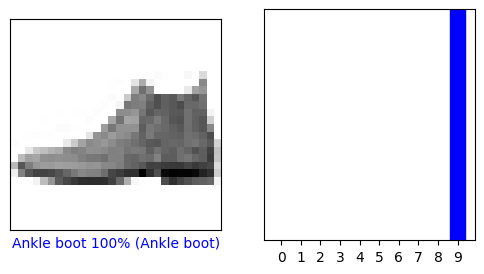

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

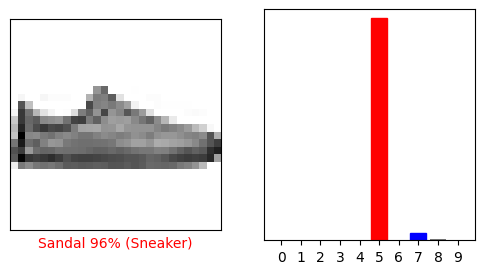

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

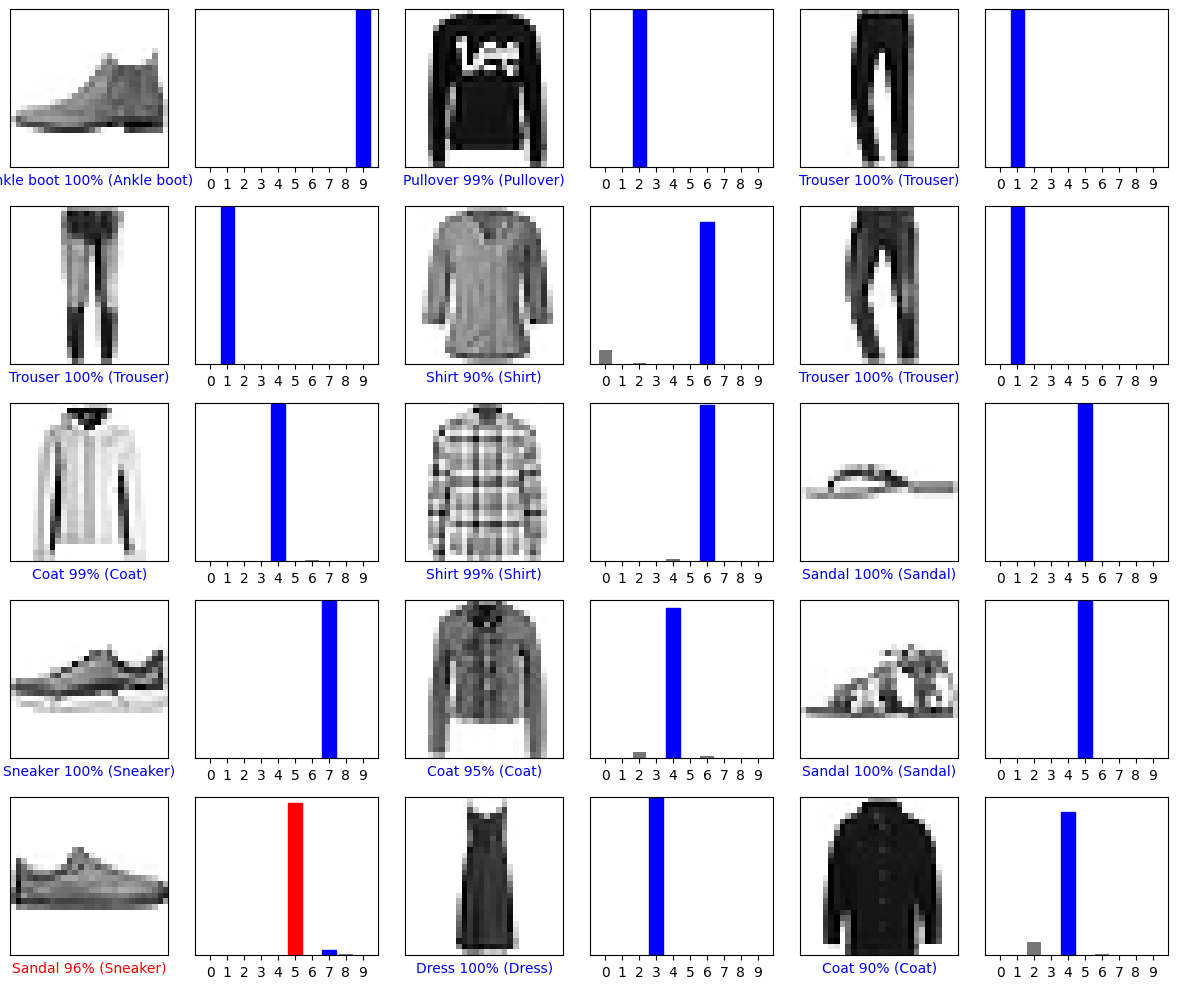

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**plot_image(i, predictions_array, true_label, img)**
This function is used to plot an image along with its predicted and true labels.

i: Index of the image to plot.
predictions_array: Array containing the model's prediction probabilities for each class.
true_label: True label of the image.
img: Image data.
Steps:

true_label, img = true_label[i], img[i]: Extracts the true label and image data for the specified index i.
plt.grid(False), plt.xticks([]), plt.yticks([]): These commands configure the plot to remove the grid lines and ticks on both the x and y axes.
plt.imshow(img, cmap=plt.cm.binary): Displays the image using matplotlib's imshow() function with a binary colormap, which displays the image in grayscale.
predicted_label = np.argmax(predictions_array): Computes the predicted label by finding the index with the highest probability in the predictions_array.
if predicted_label == true_label: color = 'blue' else: color = 'red': Determines the color for the predicted label text based on whether it matches the true label or not.
plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color): Sets the x-axis label, which includes the predicted label, its confidence score, and the true label, formatted as a percentage. The text color is determined by the color variable.
Function plot_value_array(i, predictions_array, true_label)
This function is used to plot a bar chart representing the prediction probabilities for each class.

i: Index of the image.
predictions_array: Array containing the model's prediction probabilities for each class.
true_label: True label of the image.
Steps:

true_label = true_label[i]: Extracts the true label for the specified index i.
plt.grid(False), plt.xticks(range(10)), plt.yticks([]): Configures the plot to remove the grid lines, sets the x-axis ticks to range(10) (assuming there are 10 classes), and removes the y-axis ticks.
thisplot = plt.bar(range(10), predictions_array, color="#777777"): Creates a bar chart with 10 bars, one for each class, representing the prediction probabilities. The color is set to a shade of gray.
plt.ylim([0, 1]): Sets the y-axis limits to [0, 1] to represent probabilities.
predicted_label = np.argmax(predictions_array): Computes the predicted label by finding the index with the highest probability in the predictions_array.
thisplot[predicted_label].set_color('red'), thisplot[true_label].set_color('blue'): Sets the color of the bar corresponding to the predicted label to red, and the color of the bar corresponding to the true label to blue.
These functions are typically used in conjunction with each other to visualize the model's predictions on a particular image.

In [ ]:
import numpy as np
given_photo = np.ones((28, 28))
#prediction2 = model.predict(np.expand_dims(given_photo, axis=0))
#prediction2
per=probability_model.predict(np.expand_dims(given_photo, axis=0))
per
#np.argmax(per)

1/1 [==============================] - 0s 19ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
np.argmax(per)

8

In [ ]:
class_names[np.argmax(per)]

'Bag'

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 49ms/step


[[3.0403002e-04 1.8616846e-13 9.9458426e-01 2.7902834e-07 1.9599060e-03
  1.3284789e-11 3.1515942e-03 3.1336544e-12 9.8705077e-10 1.1858555e-09]]


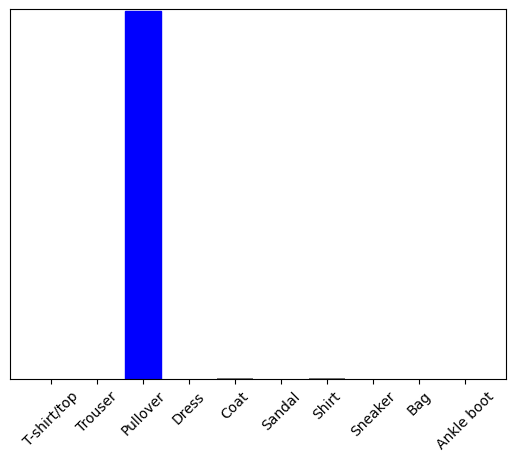

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).